<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/nlp-with-transformers/blob/main/06_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="ÏΩîÎû©ÏóêÏÑú Ïã§ÌñâÌïòÍ∏∞"/></a>
</td></tr></table>

Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùÑ ÏΩîÎû©ÏóêÏÑú Ïã§ÌñâÌïòÎ†§Î©¥ Pro Î≤ÑÏ†ÑÏù¥ ÌïÑÏöîÌï† Ïàò ÏûàÏäµÎãàÎã§.

In [1]:
# ÏΩîÎû©ÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏúºÎ©¥ Îã§Ïùå ÏΩîÎìúÎ•º Ï£ºÏÑù Ï≤òÎ¶¨ÌïòÏÑ∏Ïöî.
# !git clone https://github.com/rickiepark/nlp-with-transformers.git
# %cd nlp-with-transformers
# from install import *
# install_requirements(chapter=6)

In [1]:
from transformers import pipeline, set_seed

# ÏöîÏïΩ

## CNN/DailyMail Îç∞Ïù¥ÌÑ∞ÏÖã

In [2]:
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", "3.0.0")
print(dataset["train"][0])


train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

C:\Users\kikim\anaconda3\envs\nlp\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kikim\.cache\huggingface\hub\datasets--cnn_dailymail. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported ¬£20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office cha

In [3]:
sample = dataset["train"][1]
print(f"""Í∏∞ÏÇ¨ (500Í∞ú Î¨∏Ïûê Î∞úÏ∑å, Ï¥ù Í∏∏Ïù¥: {len(sample["article"])}):""")
print(sample["article"][:500])
print(f'\nÏöîÏïΩ (Í∏∏Ïù¥: {len(sample["highlights"])}):')
print(sample["highlights"])

Í∏∞ÏÇ¨ (500Í∞ú Î¨∏Ïûê Î∞úÏ∑å, Ï¥ù Í∏∏Ïù¥: 4051):
Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most s

ÏöîÏïΩ (Í∏∏Ïù¥: 281):
Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .


dataset Íµ¨Ï°∞Îäî Í∏∞ÏÇ¨ ÏõêÎ¨∏Ïóê Ìï¥ÎãπÌïòÎäî articleÍ≥º Í∏∞ÏÇ¨ ÏöîÏïΩÏóê Ìï¥ÎãπÌïòÎäî highlightsÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ÏûàÏùå

In [9]:
sample

{'article': 'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and less li

## ÌÖçÏä§Ìä∏ ÏöîÏïΩ ÌååÏù¥ÌîÑÎùºÏù∏

In [4]:
sample_text = dataset["train"][1]["article"][:2000]
# ÎîïÏÖîÎÑàÎ¶¨Ïóê Í∞Å Î™®Îç∏Ïù¥ ÏÉùÏÑ±Ìïú ÏöîÏïΩÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
summaries = {}

In [5]:
import nltk
from nltk.tokenize import sent_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kikim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
string = "The U.S. are a country. The U.N. is an organization."
sent_tokenize(string)

['The U.S. are a country.', 'The U.N. is an organization.']

### ÏöîÏïΩ Í∏∞Ï§Ä Î™®Îç∏

In [7]:
def three_sentence_summary(text):
    return "\n".join(sent_tokenize(text)[:3]) # Î¨∏Ïû• Îã®ÏúÑÎ°ú Ï™ºÍ∞úÏ£ºÎäî punktÎ•º Ïù¥Ïö©ÌïòÏó¨ ÏïûÏóê 3Í∞ú Î¨∏Ïû•Îßå Ï∂îÏ∂úÌïòÎäî Î©îÏÜåÎìú

In [8]:
summaries["baseline"] = three_sentence_summary(sample_text)

In [9]:
summaries

{'baseline': 'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.\nHere, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.\nMIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."'}

### GPT-2

In [10]:
from transformers import pipeline, set_seed

set_seed(42)

# ÏΩîÎû©Ïùò Í≤ΩÏö∞ gpt2-xlÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ Î©îÎ™®Î¶¨ Î∂ÄÏ°± ÏóêÎü¨Í∞Ä Î∞úÏÉùÌï©ÎãàÎã§.
# ÎåÄÏã† "gpt" ÎòêÎäî "gpt2-large"Î°ú ÏßÄÏ†ïÌïòÍ±∞ÎÇò ÏΩîÎû© ÌîÑÎ°úÎ•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.
pipe = pipeline("text-generation", model="gpt2")

gpt2_query = sample_text + "\nTL;DR:\n" # "Too Long; Didn't Read"Ïùò ÏïΩÏñ¥Î°ú ÏöîÏïΩÏùÑ ÏöîÏ≤≠ÌïòÎäî ÌîÑÎ°¨ÌîÑÌä∏ ÌòïÏãùÏùÑ ÎßåÎì¶ 
pipe_out = pipe(gpt2_query, max_length=512, clean_up_tokenization_spaces=True) # Î∂àÌïÑÏöîÌïú Í≥µÎ∞±ÏùÑ Ï†úÍ±∞Ìï¥Ï§å 
summaries["gpt2"] = "\n".join(
    sent_tokenize(pipe_out[0]["generated_text"][len(gpt2_query) :])) #pipeoutÏóêÏÑú ÎÇòÏò® Ï†ÑÏ≤¥ Î¨∏Ïû• Ï§ë Î™®Îç∏Ïù¥ ÏÉùÏÑ±Ìïú Ï†ÑÏ≤¥ ÌÖçÏä§Ìä∏ Ï§ëÏóêÏÑú ÌîÑÎ°¨ÌîÑÌä∏ Î∂ÄÎ∂ÑÏùÑ Ï†úÏô∏ÌïòÍ≥† ÏÉùÏÑ±Ìïú Î∂ÄÎ∂ÑÎßå Ï∂úÎ†•

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

C:\Users\kikim\anaconda3\envs\nlp\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kikim\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [11]:
summaries["gpt2"]

'\nThe prison in jail that serves the mentally ill is a mental health facility with 12,000 inmates.\nIt was founded by psychiatrist Dr. Daniel M. Dufour, who was born in New Orleans by his parents when he was 12.\nThe prison is not just overcrowded: it has been labeled a death camp.\nAccording to the U.S. Department of Justice, about'

### T5

<img alt="T5" width="700" caption="Diagram of T5's text-to-text framework (courtesy of Colin Raffel); besides translation and summarization, the CoLA (linguistic acceptability) and STSB (semantic similarity) tasks are shown" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter08_t5.png?raw=1" id="T5"/>

üõ†Ô∏è Ï£ºÏöî ÏûëÏóÖ Ïú†Ìòï(Task Types)
T5Îäî Îã§ÏùåÍ≥º Í∞ôÏùÄ NLP ÌÉúÏä§ÌÅ¨Ïóê Î™®Îëê ÌôúÏö©

‚úÖ ÌÖçÏä§Ìä∏ ÏöîÏïΩ (Summarization)

‚úÖ Í∏∞Í≥Ñ Î≤àÏó≠ (Translation)

‚úÖ Î¨∏Ïû• Î∂ÑÎ•ò (Classification)

‚úÖ Î¨∏Ïû• Ïú†ÏÇ¨ÎèÑ ÌåêÎã® (Regression)

‚úÖ ÏßàÎ¨∏ ÏÉùÏÑ± Î∞è ÎãµÎ≥Ä (QA)

‚úÖ Í∞êÏ†ï Î∂ÑÏÑù (Sentiment Analysis)

‚úÖ Í∞úÏ≤¥Î™Ö Ïù∏Ïãù (NER) Îì±

| Ìï≠Î™©                        | ÏÑ§Î™Ö                                                                   |
| ------------------------- | -------------------------------------------------------------------- |
| üß© **Text-to-Text ÌÜµÏùº Íµ¨Ï°∞** | Î™®Îì† ÌÉúÏä§ÌÅ¨Î•º "ÌÖçÏä§Ìä∏ ‚Üí ÌÖçÏä§Ìä∏"Î°ú ÌÜµÌï©ÌïòÏó¨ ÏùºÍ¥ÄÎêú ÌïôÏäµ Íµ¨Ï°∞ Ï†úÍ≥µ                               |
| üóÇ **Î©ÄÌã∞ÌÉúÏä§ÌÅ¨ ÌïôÏäµ**           | Îã§ÏñëÌïú ÌÉúÏä§ÌÅ¨Î•º ÌïòÎÇòÏùò Î™®Îç∏ÏóêÏÑú ÎèôÏãúÏóê ÌïôÏäµ Í∞ÄÎä•                                          |
| üîß **ÌîÑÎ°¨ÌîÑÌä∏ Í∏∞Î∞ò Ï†úÏñ¥**         | `"summarize:"`, `"translate:"` Îì±Ïùò Î™ÖÎ†πÏñ¥Î°ú ÌÉúÏä§ÌÅ¨ Ï†úÏñ¥ Í∞ÄÎä•                     |
| üß† **ÏÇ¨Ï†ÑÌïôÏäµ + ÌååÏù∏ÌäúÎãù**        | ÎåÄÍ∑úÎ™® ÏΩîÌçºÏä§ ÏÇ¨Ï†ÑÌïôÏäµ ÌõÑ Îã§ÏñëÌïú ÌÉúÏä§ÌÅ¨Ïóê ÎßûÏ∂∞ ÌååÏù∏ÌäúÎãù Í∞ÄÎä•                                   |
| üìê **ÌôïÏû•ÏÑ±**                | `t5-small` ‚Üí `t5-base` ‚Üí `t5-large` ‚Üí `t5-3b` ‚Üí `t5-11b` Îì± Îã§ÏñëÌïú ÌÅ¨Í∏∞ Ï†úÍ≥µ |


In [12]:
pipe = pipeline("summarization", model="t5-small")
pipe_out = pipe(sample_text)
summaries["t5"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

C:\Users\kikim\anaconda3\envs\nlp\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kikim\.cache\huggingface\hub\models--t5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu


### BART

BartÎäî encoderÏóêÏÑú ÏÜêÏÉÅÏãúÌÇ® Î¨∏Ïû•ÏùÑ Î≥µÏõêÌïòÎäî Î∞©Î≤ïÏúºÎ°ú ÌïôÏäµÎêòÍ≥†, decoderÏóêÏÑú Í∏∞Ï°¥ transformerÏóêÏÑú ÌïôÏäµ ÌïòÎäîÍ≤ÉÍ≥º Í∞ôÏù¥ autoregressive decoding(tokenÏùÑ ÏàúÏÑúÎåÄÎ°ú ÏÉùÏÑ±)ÏúºÎ°ú ÏÇ¨Ï†ÑÌïôÏäµÏùÑ ÏßÑÌñâÌïòÎäî Î™®Îç∏  

### üìö BARTÏùò Pretraining ÏÜêÏÉÅ Í∏∞Î≤ï Ï†ïÎ¶¨
BARTÎäî Îã§ÏñëÌïú ÏÜêÏÉÅ(Corruption) Í∏∞Î≤ïÏùÑ ÌÜµÌï¥ ÏûÖÎ†• Î¨∏Ïû•ÏùÑ Î≥ÄÌòïÌïú ÌõÑ, ÏõêÎûò Î¨∏Ïû•ÏùÑ Î≥µÏõêÌïòÎäî Î∞©ÏãùÏúºÎ°ú ÏÇ¨Ï†ÑÌïôÏäµÏùÑ ÏàòÌñâÌï©ÎãàÎã§. Ïù¥ Í≥ºÏ†ïÏùÑ ÌÜµÌï¥ Î¨∏Ïû•Ïùò Íµ¨Ï°∞ÏôÄ ÏùòÎØ∏Î•º ÍπäÏù¥ ÏûàÍ≤å ÌïôÏäµÌï† Ïàò ÏûàÏäµÎãàÎã§.

### üü© Token Masking
Í∏∞Ï°¥Ïùò BERT Î™®Îç∏Ï≤òÎüº Î¨¥ÏûëÏúÑÏùò ÌÜ†ÌÅ∞Îì§ÏùÑ ÎßàÏä§ÌÇπÌï©ÎãàÎã§.
ÎßàÏä§ÌÇπÎêú ÌÜ†ÌÅ∞Ïù¥ Î¨¥ÏóáÏù¥ÏóàÎäîÏßÄÎ•º ÏòàÏ∏°ÌïòÎäî Î∞©ÏãùÏúºÎ°ú ÌïôÏäµÏù¥ ÏßÑÌñâÎê©ÎãàÎã§.

### üü• Token Deletion
Î¨¥ÏûëÏúÑÎ°ú ÏÑ†ÌÉùÎêú ÌÜ†ÌÅ∞Îì§ÏùÑ ÏÇ≠Ï†úÌï©ÎãàÎã§.
ÎßàÏä§ÌÇπÍ≥º Îã¨Î¶¨ ÏÇ≠Ï†úÎêú ÏúÑÏπòÏóê ÎåÄÌïú Ï†ïÎ≥¥Í∞Ä Ï£ºÏñ¥ÏßÄÏßÄ ÏïäÏïÑ, Ìï¥Îãπ ÏúÑÏπòÎ•º Ï∂îÏ†ïÌï¥Ïïº ÌïòÎØÄÎ°ú Îçî Ïñ¥Î†§Ïö¥ Î≥µÏõê ÏûëÏóÖÏù¥ ÏöîÍµ¨Îê©ÎãàÎã§.

### üü® Sentence Permutation
Î¨∏Ïû• Í∞ÑÏùò ÏàúÏÑúÎ•º ÏÑûÏñ¥ ÎÖ∏Ïù¥Ï¶àÎ•º Ï∂îÍ∞ÄÌï©ÎãàÎã§.
Î¨∏Îß•ÏùÑ Î¨¥ÏãúÌïú ÏàúÏÑú Î≥ÄÍ≤ΩÏùÑ ÌÜµÌï¥ Î¨∏Ïû•Ïùò Ï†ÑÎ∞òÏ†Å Íµ¨Ï°∞ Ïù¥Ìï¥ Îä•Î†•ÏùÑ ÌïôÏäµÌï©ÎãàÎã§.

### üü¶ Document Rotation
Î¨∏ÏÑú ÎÇ¥ÏóêÏÑú ÏûÑÏùòÏùò ÌÜ†ÌÅ∞ÏùÑ ÏÑ†ÌÉùÌï¥ Ìï¥Îãπ ÏúÑÏπòÎ•º Î¨∏Ïû•Ïùò ÏãúÏûëÏ†êÏúºÎ°ú ÎßåÎì§Í≥†, ÎÇòÎ®∏ÏßÄ ÌÜ†ÌÅ∞Îì§ÏùÑ Ïû¨Î∞∞Ïó¥Ìï©ÎãàÎã§.
Ïù¥Îäî Î¨∏ÏÑúÏùò ÏãúÏûëÏ†êÏùÑ Ïù∏ÏßÄÌïòÎäî Îä•Î†•ÏùÑ ÌïôÏäµÌïòÎäî Îç∞Ïóê ÌôúÏö©Îê©ÎãàÎã§.

### üü™ Text Infilling
ÎÖºÎ¨∏ÏóêÏÑú Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏïòÎã§Í≥† Ïñ∏Í∏âÎêú Î∞©ÏãùÏûÖÎãàÎã§.
Poisson Î∂ÑÌè¨(Œª=3)Ïóê Îî∞Îùº span Í∏∏Ïù¥Î•º Í≤∞Ï†ïÌïòÍ≥†, Ìï¥Îãπ spanÏùÑ ÌÜµÏß∏Î°ú ÎßàÏä§ÌÇπÌï©ÎãàÎã§.
Ïù¥ Î∞©ÏãùÏùÄ Î¨∏Ïû• ÎÇ¥ Ïó∞ÏÜçÎêú Í≥µÎ∞±ÏùÑ Î≥µÏõêÌïòÎäî Îä•Î†•ÏùÑ ÏßëÏ§ëÏ†ÅÏúºÎ°ú ÌïôÏäµÏãúÌÇµÎãàÎã§.
KoBART Îì± ÏùºÎ∂Ä ÌååÏÉù Î™®Îç∏ÏùÄ Ïù¥ Î∞©ÏãùÎßåÏùÑ ÏÇ¨Ïö©Ìï¥ ÌïôÏäµÎêòÍ∏∞ÎèÑ ÌñàÏäµÎãàÎã§.  

![Î∞îÌä∏Ïùò ÏÜêÏÉÅÌïôÏäµ Î∞©Î≤ï](https://postfiles.pstatic.net/MjAyNDAzMDJfMTc0/MDAxNzA5MzcwMDA3MDA4.407hftle_SMjBPf9iENDX9z98-lFHOp1rCrVYWIVsBIg.IbCZVScL4ykREOBelCPClK5RR4feLcmppcpctQSvQHIg.PNG/image.png?type=w773)



In [13]:
pipe = pipeline("summarization", model="facebook/bart-large-cnn")
pipe_out = pipe(sample_text)
summaries["bart"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

C:\Users\kikim\anaconda3\envs\nlp\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kikim\.cache\huggingface\hub\models--facebook--bart-large-cnn. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [14]:
from transformers import pipeline
from nltk.tokenize import sent_tokenize

pipe = pipeline("summarization", model="facebook/bart-base")
pipe_out = pipe(sample_text, max_length=130, min_length=30, do_sample=False)
summaries["bart"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))


config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

C:\Users\kikim\anaconda3\envs\nlp\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kikim\.cache\huggingface\hub\models--facebook--bart-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


### PEGASUS

PEGASUSÎäî GoogleÏóêÏÑú Í∞úÎ∞úÌïú Ï∂îÏÉÅÏ†Å ÏöîÏïΩ(abstractive summarization) ÌäπÌôî Î™®Îç∏Î°ú,
Í∏∞Ï°¥Ïùò ÎßàÏä§ÌÇπ Î∞©Ïãù ÎåÄÏã† Î¨∏Ïû• Ï†ÑÏ≤¥Î•º ÎßàÏä§ÌÇπ(masked gap sentence)ÌïòÍ≥† Í∑∏Í±∏ ÏÉùÏÑ±ÌïòÎèÑÎ°ù ÌïôÏäµ

<img alt="pegasus" width="700" caption="Diagram of PEGASUS architecture (courtesy of Jingqing Zhang et al.)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter08_pegasus.png?raw=1" id="pegasus"/>

| Îã®Í≥Ñ                   | ÎÇ¥Ïö©                                         |
| -------------------- | ------------------------------------------ |
| **1. Î¨∏Ïû• ÏÑ†ÌÉù**         | Ï§ëÏöîÌïú Î¨∏Ïû• 2Í∞ú ÏÑ†ÌÉù (`mythical`, `names`)         |
| **2. ÏûÖÎ†• Íµ¨ÏÑ±**         | Ìï¥Îãπ Î¨∏Ïû•ÏùÑ `[MASK1]`, `[MASK2]`Î°ú ÏπòÌôòÌïú ÏûÖÎ†• ÌÖçÏä§Ìä∏ ÏÉùÏÑ± |
| **3. Î™©Ìëú Ï∂úÎ†•(Target)** | Ï†úÍ±∞Îêú Î¨∏Ïû•ÏùÑ ÏàúÏ∞®Ï†ÅÏúºÎ°ú Î≥µÏõê (`It is pure white.` Îì±)   |
| **4. ÎîîÏΩîÎçî ÏûÖÎ†•**        | Ï∂úÎ†• Î¨∏Ïû•ÏùÑ Ìïú Ïπ∏ Ïò§Î•∏Ï™ΩÏúºÎ°ú ÏãúÌîÑÌä∏ÌïòÏó¨ ÎîîÏΩîÎçîÏóê Í≥µÍ∏â             |


In [13]:
pipe = pipeline("summarization", model="google/pegasus-cnn_dailymail")
pipe_out = pipe(sample_text)
summaries["pegasus"] = pipe_out[0]["summary_text"].replace(" .<n>", ".\n")

In [15]:
from transformers import pipeline

summarizer = pipeline("summarization", model="google/pegasus-xsum")
summary = summarizer(sample_text, max_length=60, min_length=20, do_sample=False)
print(summary[0]["summary_text"])


config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

C:\Users\kikim\anaconda3\envs\nlp\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kikim\.cache\huggingface\hub\models--google--pegasus-xsum. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Device set to use cpu


An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.


## ÏöîÏïΩ Í≤∞Í≥º ÎπÑÍµêÌïòÍ∏∞

In [22]:
print("GROUND TRUTH")
print(dataset["train"][1]["highlights"])
print("")

for model_name in summaries:
    print(model_name.upper())
    print(summaries[model_name])
    print("")

GROUND TRUTH
Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .

BASELINE
Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.
Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.
MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."

GPT2

The prison in jail that serves the mentally ill is a mental health facility with 12,000 inmates.
It was founded by psychiatrist Dr. Daniel M. Dufour, who was born in New Orleans by his parents when he was 12.
The pris

## ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏ ÌíàÏßà ÌèâÍ∞ÄÌïòÍ∏∞

### BLEU

 - Í∏∞Í≥Ñ Î≤àÏó≠Ïùò ÏÑ±Îä• ÌèâÍ∞ÄÎ•º ÏÇ¨ÎûåÏù¥ Î≥ÄÏó≠Ìïú Í≤ÉÍ≥º Ïú†ÏÇ¨Ìï†ÏàòÎ°ù Îçî ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄ Í∏∞Í≥ÑÎ≤àÏó≠Ïù¥ÎùºÍ≥† Î≥∏Îã§ÎùºÎäî Í≤¨Ìï¥ÏóêÏÑú Ïò® ÌÖçÏä§Ìä∏ ÌíàÏßà ÌèâÍ∞Ä ÏßÄÌëú  

- precisionÏùÑ Í∏∞Î∞òÏúºÎ°ú Ìïú ÏßÄÌëú  

- Îã®ÏàúÌûà generated sentenceÏóê reference sentenceÏùò Îã®Ïñ¥Í∞Ä ÏûàÎäîÏßÄ Ïó¨Î∂ÄÎßå ÌåêÎã®ÌïòÏó¨ Í∑∏ Í∞úÏàòÎ•º count Ìï¥Ï£ºÎäî Î∞©Î≤ï:  

![Î∞îÌä∏Ïùò ÏÜêÏÉÅÌïôÏäµ Î∞©Î≤ï](https://velog.velcdn.com/images/bluebarry3/post/9d828e9a-2cd4-4637-8846-d628ced45e18/image.png)

### Ìï¥Îãπ Î∞©Î≤ïÏùò Î¨∏Ï†úÏ†ê
![Î¨∏Ï†ú](https://velog.velcdn.com/images/bluebarry3/post/b242bfc0-82c0-4d1c-80c0-c5efc14b5864/image.png)
  
![Ìï¥Í≤∞](https://velog.velcdn.com/images/bluebarry3/post/2e23939b-7987-4702-9535-99680c529fc7/image.png)
![Ìï¥Í≤∞](https://velog.velcdn.com/images/bluebarry3/post/eacf3b81-7ad2-4b4b-8ca2-4b9e34ce13e5/image.png)

Îã§ÏùåÍ≥º Í∞ôÏù¥ n-gramÏóê ÎåÄÌïú ÌôïÎ•†ÏùÑ Í∏∞ÌïòÌèâÍ∑†(Î™®Îëê Í≥±Ìï¥Ï§Ä Í∞íÏùÑ, Í∑∏ Í∞íÏùò Í∞úÏàòÏóê Ìï¥ÎãπÌïòÎäî Ï†úÍ≥±Í∑ºÏúºÎ°ú ÎÇòÎàÑÎäî Í≤É) Ìï¥Ï§ÄÎã§.

### Ï§ëÎ≥µ Îã®Ïñ¥Î°ú Ïù∏Ìïú Í≥ºÏ†ÅÌï© Î≥¥Ï†ï
clippingÏùÑ ÌÜµÌï¥ reference sentenceÏùò Îã®Ïñ¥Îì§Ïùò countÎ•º ÏµúÎåÄÎ°ú ÎëîÎã§. Ïù¥Îäî Î™®Îì†   n-gramÍ≥ºÏ†ïÏóêÏÑú Ï†ÅÏö©ÌïúÎã§.

### Î¨∏Ïû•Í∏∏Ïù¥Ïóê ÎåÄÌïú Î≥¥Ï†ï
![Ìï¥Í≤∞](https://velog.velcdn.com/images/bluebarry3/post/c2a6565a-8a53-4a4c-81ae-d351426be3d1/image.png)
Ìï¥Îãπ Î≥¥Ï†ïÏùÄ n=1,2 ÍπåÏßÄ Ìï¥Îãπ Í∞íÏùÑ Í≥±Ìï¥Ï§ÄÎã§.  

### BLEU score Í≥ÑÏÇ∞ Í≥ºÏ†ï
1) n-gram ÏùºÏπòÎèÑ Í≥ÑÏÇ∞  
2) 1)ÏùÑ Í∏∞Ìïò ÌèâÍ∑†ÌïòÏó¨ Ï¢ÖÌï© Ï†êÏàòÎ•º ÎèÑÏ∂ú  
3) BP Ï†ÅÏö©  
4) BLEU scoreÏù¥ 0~1ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú ÎÇòÌÉÄÎÇ®(or Î∞±Î∂ÑÏú® ÌëúÏãú)  


![Ïä§ÏΩîÏñ¥](https://velog.velcdn.com/images/bluebarry3/post/7cc7f41c-d0cf-414d-a143-cb00e0060d72/image.png)

In [19]:
!pip install evaluate

In [21]:
import evaluate

bleu_metric = evaluate.load("sacrebleu")

ModuleNotFoundError: No module named 'evaluate'

In [20]:
import pandas as pd
import numpy as np

bleu_metric.add(
    prediction="the the the the the the", # ÏòàÏ∏°
    reference=["the cat is on the mat"]) # Ï∞∏Ï°∞ 

results = bleu_metric.compute(smooth_method="floor", smooth_value=0) # BLEU Í≥ÑÏÇ∞ 

results["precisions"] = [np.round(p, 2) for p in results["precisions"]] # ÏÜåÏàòÏ†ê Î∞òÏò¨Î¶º 

pd.DataFrame.from_dict(results, orient="index", columns=["Value"]) # 

Value
score                          0.0
counts                [2, 0, 0, 0]
totals                [6, 5, 4, 3]
precisions  [33.33, 0.0, 0.0, 0.0]
bp                             1.0
sys_len                          6
ref_len                          6

In [21]:
bleu_metric.add(
    prediction="the cat is on mat", 
    reference=["the cat is on the mat"])

results = bleu_metric.compute(smooth_method="floor", smooth_value=0)

results["precisions"] = [np.round(p, 2) for p in results["precisions"]]

pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

Value
score                        57.893007
counts                    [5, 3, 2, 1]
totals                    [5, 4, 3, 2]
precisions  [100.0, 75.0, 66.67, 50.0]
bp                            0.818731
sys_len                              5
ref_len                              6

### ROUGE

recall Í∏∞Î∞òÏùò ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú  

**ROUGE-1** : n-gram recall  

Ï†ïÎãµ Î¨∏Ïû•: "ÌïúÌôîÎäî 10 ÎÖÑ ÏïàÏóê Ïö∞Ïäπ Ìï† Í≤ÉÏù¥Îã§."  
ÏÉùÏÑ± Î¨∏Ïû•: "ÎëêÏÇ∞ÏùÄ 3 ÎÖÑ ÏïàÏóê Ïö∞Ïäπ Ìï† Í≤ÉÏù¥Îã§."  

- $N_{\text{Ï†ïÎãµÎ¨∏Ïû•}} = 7$  
- $N_{\text{ÏùºÏπò Îã®Ïñ¥ Ïàò}} = \text{"ÎÖÑ", "Ïïà", "Ïö∞Ïäπ", "Ìï†", "Í≤ÉÏù¥Îã§"} = 5$  


$$
\text{ROUGE-1} = \frac{N_{\text{ÏùºÏπò Îã®Ïñ¥ Ïàò}}}{N_{\text{Ï†ïÎãµÎ¨∏Ïû•}}} = \frac{5}{7}
$$

**ROUCE-2** : 

Ï†ïÎãµ Î¨∏Ïû•: "ÌïúÌôîÎäî 10 ÎÖÑ ÏïàÏóê Ïö∞Ïäπ Ìï† Í≤ÉÏù¥Îã§."  
ÏÉùÏÑ± Î¨∏Ïû•: "ÌïúÌôîÎäî 10 ÎÖÑ ÏïàÏóê Ï†àÎåÄ Ïö∞Ïäπ Î™ª Ìï† Í≤ÉÏù¥Îã§."

- $N_{\text{Ï†ïÎãµ bigrams}} = 6$  
  - ("ÌïúÌôî", "10"), ("10", "ÎÖÑ"), ("ÎÖÑ", "Ïïà"), ("Ïïà", "Ïóê"), ("Ïö∞Ïäπ", "Ìï†"), ("Ìï†", "Í≤ÉÏù¥Îã§")
- $N_{\text{ÏùºÏπò bigrams}} = 4$  
  - ("ÌïúÌôî", "10"), ("10", "ÎÖÑ"), ("ÎÖÑ", "Ïïà"), ("Ìï†", "Í≤ÉÏù¥Îã§")


$$
\text{ROUGE-2} = \frac{N_{\text{ÏùºÏπò bigrams}}}{N_{\text{Ï†ïÎãµ bigrams}}} = \frac{4}{6}
$$


**ROUGE-L** :  
Í∞ÄÏû• Í∏¥ sequenceÏùò recallÏùÑ Íµ¨Ìï®. Ïù¥Ïñ¥ÏßÄÏßÄ ÏïäÏïÑÎèÑ Îê®  

Ï†ïÎãµ Î¨∏Ïû•: "ÌïúÌôîÎäî 10 ÎÖÑ ÏïàÏóê Ïö∞Ïäπ Ìï† Í≤ÉÏù¥Îã§."  
ÏÉùÏÑ± Î¨∏Ïû•: "ÌïúÌôîÎäî 10 ÎÖÑ ÏïàÏóê Ï†àÎåÄ Ïö∞Ïäπ Î™ª Ìï† Í≤ÉÏù¥Îã§."

- $N_{\text{Ï†ïÎãµÎ¨∏Ïû•}} = 7$
- $\text{Longest Common Subsequence (LCS)} = \text{"ÌïúÌôîÎäî 10 ÎÖÑ ÏïàÏóê Ïö∞Ïäπ Ìï† Í≤ÉÏù¥Îã§."}$
- $N_{\text{LCS}} = 7$

$$
\text{ROUGE-L} = \frac{N_{\text{LCS}}}{N_{\text{Ï†ïÎãµÎ¨∏Ïû•}}} = \frac{7}{7} = 1
$$



In [22]:
rouge_metric = evaluate.load("rouge") # Î£®ÏßÄ ÌèâÍ∞Ä Ìï®ÏàòÎ•º Îã¥ÏùÄ Í∞ùÏ≤¥ 

In [23]:
reference = dataset["train"][1]["highlights"]
records = []
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

for model_name in summaries:
    rouge_metric.add(prediction=summaries[model_name], 
                     reference=reference)
    
    score = rouge_metric.compute()
    
    rouge_dict = dict((rn, score[rn]) for rn in rouge_names) # nameÎ≥ÑÎ°ú score Ï†ÄÏû• 
    
    records.append(rouge_dict)
    
pd.DataFrame.from_records(records, index=summaries.keys())

rouge1    rouge2    rougeL  rougeLsum
baseline  0.365079  0.145161  0.206349   0.285714
gpt2      0.239316  0.034783  0.119658   0.222222
t5        0.195652  0.022222  0.108696   0.173913
bart      0.322148  0.122449  0.174497   0.281879

## CNN/DailyMail Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú PEGASUS ÌèâÍ∞ÄÌïòÍ∏∞

In [5]:
# Ïù¥ ÏÖÄÏùÄ ÎÖ∏Ìä∏Î∂Å Ï§ëÍ∞ÑÎ∂ÄÌÑ∞ Ïã§ÌñâÌïòÍ∏∞ ÏúÑÌïú Í≤ÉÏûÖÎãàÎã§.
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import evaluate
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# "cnn_dailymail" Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú ÏóêÎü¨Í∞Ä Î∞úÏÉùÌï† Í≤ΩÏö∞ ÎåÄÏã† "ccdv/cnn_dailymail"ÏùÑ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", "3.0.0")
rouge_metric = evaluate.load("rouge", cache_dir=None)
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

In [6]:
def evaluate_summaries_baseline(dataset, metric, # Ï£ºÏñ¥ÏßÑ Í∏∞ÏÇ¨Ïóê ÎåÄÌï¥ÏÑú Î™®Îç∏Ïù¥ ÎßåÎì† ÏöîÏïΩÎ¨∏Ïùò rouge ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞ Ìï®Ïàò 
                                column_text="article",
                                column_summary="highlights"):
    summaries = [three_sentence_summary(text) for text in dataset[column_text]]
    metric.add_batch(predictions=summaries,
                     references=dataset[column_summary])
    score = metric.compute()
    return score

In [17]:
test_sampled = dataset["test"].shuffle(seed=42).select(range(100))

score = evaluate_summaries_baseline(test_sampled, rouge_metric) # Í∑∏ÎÉ• Í∏∞ÏÇ¨ ÏõêÎ¨∏Ïùò ÏïûÏóê 3Î¨∏Ïû•Îßå ÎΩëÏïÑÏò® Í≤ÉÍ≥ºÏùò ÎπÑÍµê 
rouge_dict = dict((rn, score[rn]) for rn in rouge_names)
pd.DataFrame.from_dict(rouge_dict, orient="index", columns=["baseline"]).T

rouge1    rouge2    rougeL  rougeLsum
baseline  0.3874  0.165793  0.245887   0.352616

In [18]:
from tqdm import tqdm
import torch

device = torch.device("cpu")

def chunks(list_of_elements, batch_size):
    """list_of_elementsÎ°úÎ∂ÄÌÑ∞ batch_size ÌÅ¨Í∏∞Ïùò Ï≤≠ÌÅ¨Î•º Ïó∞ÏÜçÏ†ÅÏúºÎ°ú ÏÉùÏÑ±Ìï©ÎãàÎã§"""
    for i in range(0, len(list_of_elements), batch_size): # Ï†ÑÏ≤¥ Î¶¨Ïä§Ìä∏Î•º Î™áÍ∞úÏî© ÎÇòÎà†ÏÑú ÏßÑÌñâÌï† ÏßÄ Í≤∞Ï†ï 
        yield list_of_elements[i : i + batch_size]

def evaluate_summaries_pegasus(dataset, metric, model, tokenizer,
                               batch_size=16, device=device,
                               column_text="article",
                               column_summary="highlights"):
    article_batches = list(chunks(dataset[column_text], batch_size))
    target_batches = list(chunks(dataset[column_summary], batch_size))

    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)): # Î¶¨Ïä§Ìä∏ ÎëêÍ∞úÎ•º Ìïú Î≤àÏóê Ïì∞Í∏∞ ÏúÑÌï¥ zipÌï®Ïàò ÏÇ¨Ïö© 
       

        inputs = tokenizer(article_batch, max_length=1024,  truncation=True,
                        padding="max_length", return_tensors="pt")
        
        # inputs = {k: v.to(device) for k, v in inputs.items()}

        summaries = model.generate(input_ids=inputs["input_ids"].to(device), # ÏöîÏïΩ ÏÉùÏÑ± Í≥ºÏ†ï ÏàòÌñâ 
                         attention_mask=inputs["attention_mask"].to(device), 
                         length_penalty=0.8, num_beams=8, max_length=164) # length_penaltyÎäî ÏöîÏïΩÏù¥ ÏßßÍ≤å ÎÇòÏò§ÎèÑÎ°ù Ïú†ÎèÑ

        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True, # ÏúÑÏóêÏÑú ÎßåÎì† Í≤∞Í≥º Î¨∏ÏûêÎ°ú Î≥ÄÌôò 
                                clean_up_tokenization_spaces=True) # ÌäπÏàò ÌÜ†ÌÅ∞Í≥º ÏÑúÎ∏åÏõåÎìú Íµ¨Î∂ÑÏûê Îì± Î∂àÌïÑÏöîÌïú Í≥µÎ∞± Ï†úÍ±∞
               for s in summaries]
        decoded_summaries = [d.replace("<n>", " ") for d in decoded_summaries]
        metric.add_batch(predictions=decoded_summaries, references=target_batch) # add_batchÎäî Ïó¨Îü¨Í∞úÏùò Í∏∞ÏÇ¨Î•º Ìïú Î≤àÏóê ÏöîÏïΩÌï† Îïå ÏÇ¨Ïö© 

    score = metric.compute()
    return score

In [12]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

#model_ckpt = "google/pegasus-cnn_dailymail"
model_ckpt = "t5-small"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)
score = evaluate_summaries_pegasus(test_sampled, rouge_metric,
                                   model, tokenizer, batch_size=8)
rouge_dict = dict((rn, score[rn]) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=["t5-small"])

ImportError: 
AutoModelForSeq2SeqLM requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.


### PEGASUS ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÍ∏∞

Token indices sequence length is longer than the specified maximum sequence length for this model (1816 > 512). Running this sequence through the model will result in indexing errors


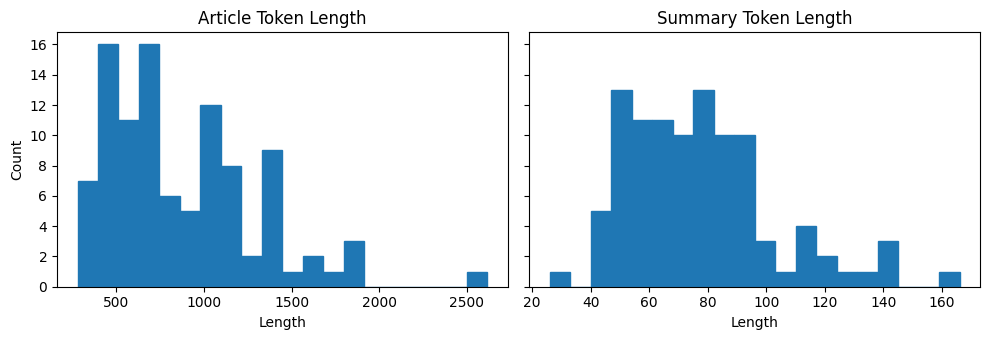

In [23]:
import matplotlib.pyplot as plt

# articleÍ≥º highlightsÏùò token Í∏∏Ïù¥ Í≥ÑÏÇ∞
d_len = [len(tokenizer.encode(s)) for s in test_sampled["article"]]
s_len = [len(tokenizer.encode(s)) for s in test_sampled["highlights"]]

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True)

axes[0].hist(d_len, bins=20, color="C0", edgecolor="C0")
axes[0].set_title("Article Token Length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")

axes[1].hist(s_len, bins=20, color="C0", edgecolor="C0")
axes[1].set_title("Summary Token Length")
axes[1].set_xlabel("Length")

plt.tight_layout()
plt.show()


In [25]:
def convert_examples_to_features(example_batch):
    # Í∏∞ÏÇ¨(article) ÏûÖÎ†• Ïù∏ÏΩîÎî©
    input_encodings = tokenizer(example_batch["article"], max_length=1024,
                                truncation=True)

    # Ï∞∏Ï°∞ ÏöîÏïΩ(highlights) Ïù∏ÏΩîÎî©
    target_encodings = tokenizer(text_target=example_batch["highlights"],
                                 max_length=128,
                                 truncation=True)

    return {
        "input_ids": input_encodings["input_ids"],
        "attention_mask": input_encodings["attention_mask"],
        "labels": target_encodings["input_ids"]
    }

# map Ìï®ÏàòÎ°ú Ï†ÑÏ≤¥ Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö© (batched=TrueÎ°ú ÏÑ±Îä• Ìñ•ÏÉÅ)
test_sampled_pt = test_sampled.map(convert_examples_to_features, batched=True)

# PyTorch ÌÖêÏÑú ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
columns = ["input_ids", "labels", "attention_mask"]
test_sampled_pt.set_format(type="torch", columns=columns) # Î™®Îç∏ ÏûÖÎ†•Í∞íÏúºÎ°ú Ïì∞Í∏∞ ÏúÑÌïú Î≥ÄÌôò 


In [26]:
# Ìã∞Ï≤ò Ìè¨Ïã±(teacher forcing)
# ÌÖçÏä§Ìä∏ ÏÉùÏÑ±ÏùÑ ÏúÑÌïú ÎîîÏΩîÎçî ÏûÖÎ†•Í≥º Î†àÏù¥Î∏îÏùò Ï†ïÎ†¨
text = ['PAD','Transformers', 'are', 'awesome', 'for', 'text', 'summarization']
rows = []
for i in range(len(text)-1):
    rows.append({'step': i+1, 'decoder_input': text[:i+1], 'label': text[i+1]})
pd.DataFrame(rows).set_index('step')

decoder_input          label
step                                                             
1                                            [PAD]   Transformers
2                              [PAD, Transformers]            are
3                         [PAD, Transformers, are]        awesome
4                [PAD, Transformers, are, awesome]            for
5           [PAD, Transformers, are, awesome, for]           text
6     [PAD, Transformers, are, awesome, for, text]  summarization

### ÎåÄÌôî ÏöîÏïΩ ÏÉùÏÑ±ÌïòÍ∏∞

## Í≤∞Î°†